In [243]:
# Import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import random
from sklearn.ensemble import RandomForestClassifier

In [244]:
# Load csv file 
df = pd.read_csv("worldCup_dataset.csv" , sep = "," , encoding = 'utf-8')

In [245]:
# Taking a look for the dataset
df.describe()

,Unnamed: 0,home_score,away_score,target
count,4789.000000,4789.000000,4789.000000,4789.000000
mean,37819.320317,1.596784,1.113594,1.063896
std,10608.849377,1.641183,1.321075,0.718599
min,1311.000000,0.000000,0.000000,0.000000
25%,40595.000000,0.000000,0.000000,1.000000
50%,41792.000000,1.000000,1.000000,1.000000
75%,42989.000000,2.000000,2.000000,2.000000
max,44186.000000,15.000000,14.000000,2.000000


In [246]:
#Preprocessing
#Finding outmissing values

df.isnull().sum()
#Perfect!
#We are good to go

Unnamed: 0    0
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
target        0
dtype: int64

In [247]:
# Exploring data
df.head(10)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,target
0,1311,7/13/1930,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,2
1,1312,7/13/1930,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1
2,1313,7/14/1930,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,2
3,1314,7/14/1930,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,2
4,1315,7/15/1930,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1
5,1316,7/16/1930,Chile,Mexico,3,0,FIFA World Cup,Montevideo,Uruguay,True,1
6,1317,7/17/1930,Bolivia,Yugoslavia,0,4,FIFA World Cup,Montevideo,Uruguay,True,2
7,1318,7/17/1930,Paraguay,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,2
8,1320,7/18/1930,Uruguay,Peru,1,0,FIFA World Cup,Montevideo,Uruguay,False,1
9,1321,7/19/1930,Argentina,Mexico,6,3,FIFA World Cup,Montevideo,Uruguay,True,1


In [248]:
df.tail(10)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,target
4779,44177,11/25/2022,Wales,Iran,0,2,FIFA World Cup,Al Rayyan,Qatar,True,2
4780,44178,11/25/2022,England,United States,0,0,FIFA World Cup,Al Khor,Qatar,True,0
4781,44179,11/26/2022,Poland,Saudi Arabia,2,0,FIFA World Cup,Al Rayyan,Qatar,True,1
4782,44180,11/26/2022,Argentina,Mexico,2,0,FIFA World Cup,Lusail,Qatar,True,1
4783,44181,11/26/2022,Tunisia,Australia,0,1,FIFA World Cup,Al Wakrah,Qatar,True,2
4784,44182,11/26/2022,France,Denmark,2,1,FIFA World Cup,Doha,Qatar,True,1
4785,44183,11/27/2022,Japan,Costa Rica,0,1,FIFA World Cup,Al Rayyan,Qatar,True,2
4786,44184,11/27/2022,Spain,Germany,1,1,FIFA World Cup,Al Khor,Qatar,True,0
4787,44185,11/27/2022,Belgium,Morocco,0,2,FIFA World Cup,Doha,Qatar,True,2
4788,44186,11/27/2022,Croatia,Canada,4,1,FIFA World Cup,Al Rayyan,Qatar,True,1


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4789 entries, 0 to 4788
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4789 non-null   int64 
 1   date        4789 non-null   object
 2   home_team   4789 non-null   object
 3   away_team   4789 non-null   object
 4   home_score  4789 non-null   int64 
 5   away_score  4789 non-null   int64 
 6   tournament  4789 non-null   object
 7   city        4789 non-null   object
 8   country     4789 non-null   object
 9   neutral     4789 non-null   bool  
 10  target      4789 non-null   int64 
dtypes: bool(1), int64(4), object(6)
memory usage: 378.9+ KB


In [250]:
#See what are the Countries in the dataset

countries=df.home_team.unique()
print(f"There are {len(countries)} Countries in the home_team Column\n")
print(f"Countries-{countries}")

There are 250 Countries in the home_team Column

Countries-['Belgium' 'France' 'Brazil' 'Peru' 'Argentina' 'Chile' 'Bolivia'
 'Paraguay' 'Uruguay' 'Austria' 'Czechoslovakia' 'Egypt' 'Italy'
 'Netherlands' 'Germany' 'Cuba' 'Hungary' 'Spain' 'Switzerland' 'Mexico'
 'England' 'Sweden' 'Scotland' 'South Korea' 'Colombia' 'Russia'
 'Bulgaria' 'North Korea' 'Portugal' 'Israel' 'Morocco' 'El Salvador'
 'DR Congo' 'German DR' 'Poland' 'Yugoslavia' 'Haiti' 'Australia' 'Iran'
 'Algeria' 'Honduras' 'Canada' 'Northern Ireland' 'Denmark' 'Iraq'
 'United Arab Emirates' 'United States' 'Costa Rica' 'Cameroon'
 'Republic of Ireland' 'Norway' 'Nigeria' 'Romania' 'Saudi Arabia'
 'Greece' 'Jamaica' 'Serbia' 'South Africa' 'Japan' 'Croatia' 'China PR'
 'Tunisia' 'Senegal' 'Slovenia' 'Ecuador' 'Turkey' 'Trinidad and Tobago'
 'Angola' 'Czech Republic' 'Togo' 'Ivory Coast' 'Ghana' 'Ukraine'
 'New Zealand' 'Slovakia' 'Bosnia and Herzegovina' 'Iceland' 'Panama'
 'Liberia' 'Belize' 'Palestine' 'Guatemala' 'Ando

In [251]:
#Making a new colum named "Win_Statues" to store the result(Win,Lost,Draw) of the home team

conditions  = [df["home_score"] ==df["away_score"], df["home_score"] > df["away_score"] , df["home_score"] < df["away_score"]]
choices     = [ "Draw", 'Win', 'Lost' ]
df["Win_Statues"] = np.select(conditions, choices)
df.head(5)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,target,Win_Statues
0,1311,7/13/1930,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,2,Lost
1,1312,7/13/1930,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1,Win
2,1313,7/14/1930,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,2,Lost
3,1314,7/14/1930,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,2,Lost
4,1315,7/15/1930,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1,Win


([<matplotlib.axis.XTick at 0x28c3c8667d0>,
 [Text(1, 0, 'Home Score'), Text(2, 0, 'Away Score')])

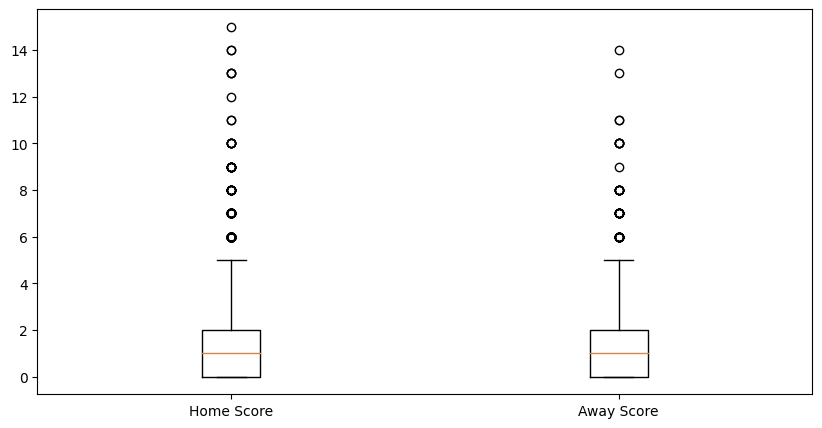

In [252]:
#finding outliers in the numerical data columns

fig = plt.figure(figsize =(10, 5))
plt.boxplot([df["home_score"],df["away_score"]])
plt.xticks([1,2], ["Home Score", "Away Score"])

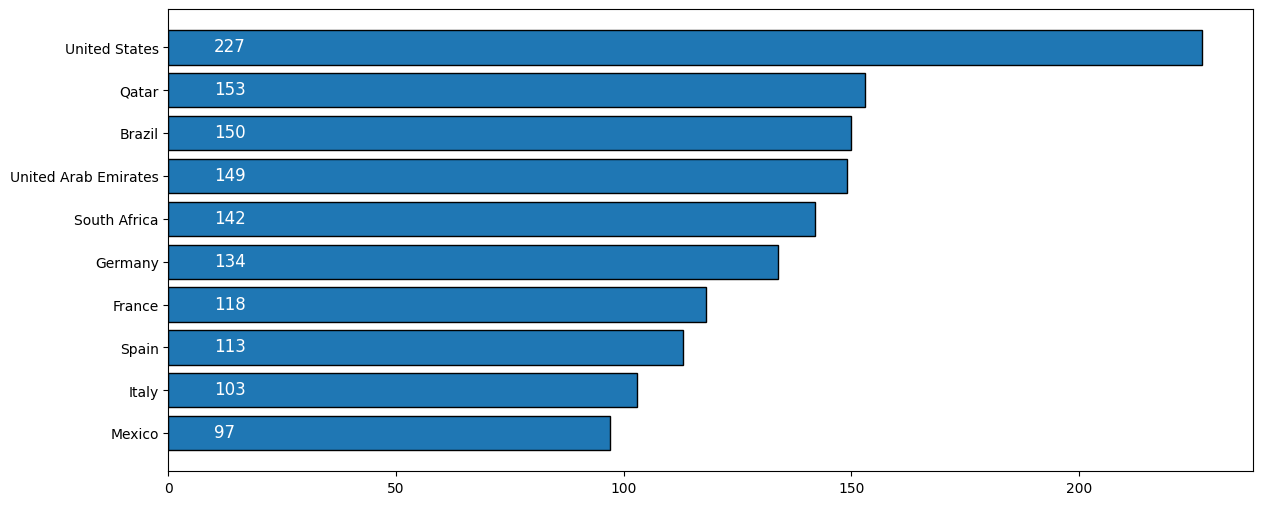

In [253]:
# Teams played most Matches
rank_bound = 10
ax = df.country.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(14,6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=10,y=i-0.1,s=value[i],color="w",fontsize=12)
plt.show()

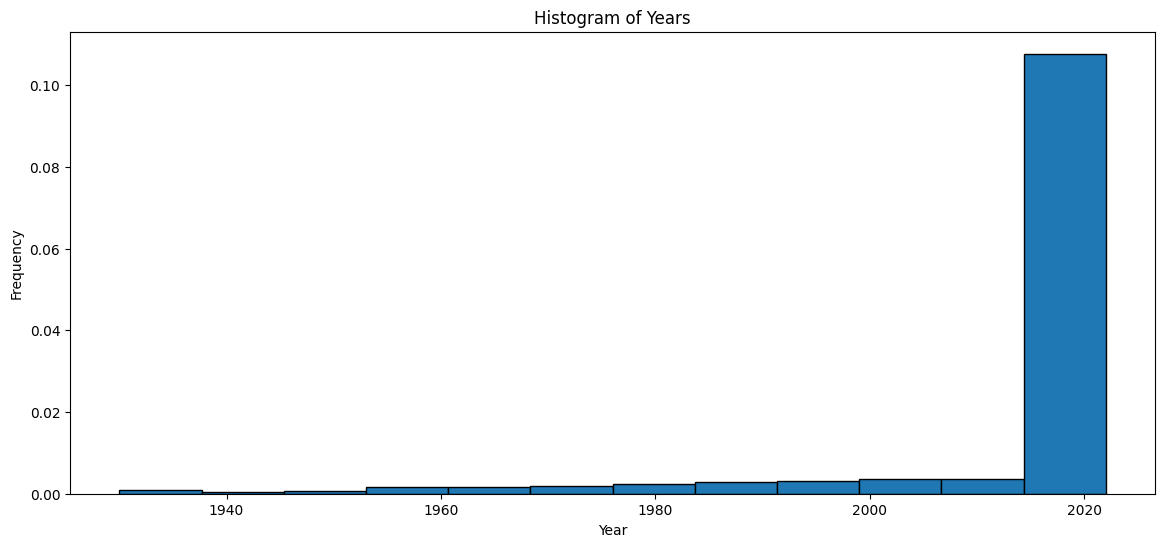

In [255]:
years = []
for date in df.date:
    years.append(int(str(date)[-4:]))
plt.figure(figsize=(14,6))
plt.hist(years, density=True, bins=12, edgecolor="k")
plt.title("Histogram of Years")
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.show()

#Most matches are played after 1970 approximatley 

In [256]:
# #Now take the rpws that home_team==Country 

data_home=df.loc[df["home_team"]==df["country"] ]

Text(0.5, 1.0, 'Home Team Winning Status')

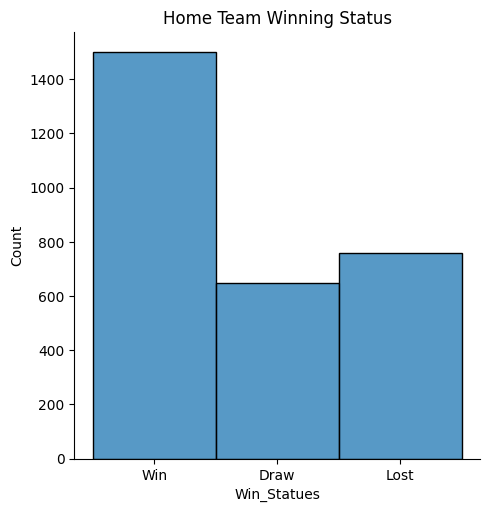

In [257]:
#Home team results
sns.displot(data_home, x="Win_Statues")
plt.title("Home Team Winning Status")

In [258]:
data_home['Win_Statues'].value_counts()

Win     1499
Lost     758
Draw     649
Name: Win_Statues, dtype: int64

In [259]:
#How each team perform while playing a tournament in home grounds

teams_win_statues=pd.crosstab(df["home_team"], df["Win_Statues"],margins=True, margins_name="Total")
teams_win_statues["team_win_probability"]=teams_win_statues["Win"]/(teams_win_statues["Total"])
#Lets take teams which plays atleast 20 games
teams_win_statues_100=teams_win_statues.loc[teams_win_statues["Total"]>20]
teams_win_statues_100=teams_win_statues_100.sort_values("team_win_probability",ascending=False)
teams_win_statues_100.head(20).style.bar(color="orange",subset="team_win_probability")

#We can see most teams has more than 40% wining probability while playing in the home grounds 

Win_Statues,Draw,Lost,Win,Total,team_win_probability
home_team,,,,,
Egypt,1,3,24,28,0.857143
Canada,1,3,18,22,0.818182
Guatemala,3,1,17,21,0.809524
Ivory Coast,4,3,21,28,0.750000
Portugal,8,5,28,41,0.682927
Senegal,5,6,23,34,0.676471
Brazil,22,17,81,120,0.675000
Malaysia,3,5,16,24,0.666667
Uzbekistan,3,6,17,26,0.653846


In [260]:
#Teams playing in away conditions

teams_away_statues=pd.crosstab(df["away_team"], df["Win_Statues"],margins=True, margins_name="Total")
teams_away_statues["team_win_probability"]=teams_away_statues["Lost"]/(teams_away_statues["Total"])
#Lets take teams which plays atleast 20 games
teams_away_statues_100=teams_away_statues.loc[teams_away_statues["Total"]>20]
teams_away_statues_100=teams_away_statues_100.sort_values("team_win_probability",ascending=False)
teams_away_statues_100.rename(columns={'Lost': 'Win'}, index={'Win': 'Lost'}, inplace=True)
teams_away_statues_100.head(20)

#The probability to wining a tournament in away conditions is very low comapred to the winning probalities in home conditions

Win_Statues,Draw,Win,Win,Total,team_win_probability
away_team,,,,,
Brazil,6,30,4,40,0.750000
Italy,13,32,11,56,0.571429
Iran,2,16,10,28,0.571429
Japan,4,14,7,25,0.560000
Germany,10,29,14,53,0.547170
Algeria,7,18,8,33,0.545455
Netherlands,11,24,9,44,0.545455
Spain,16,31,11,58,0.534483
Senegal,8,12,4,24,0.500000


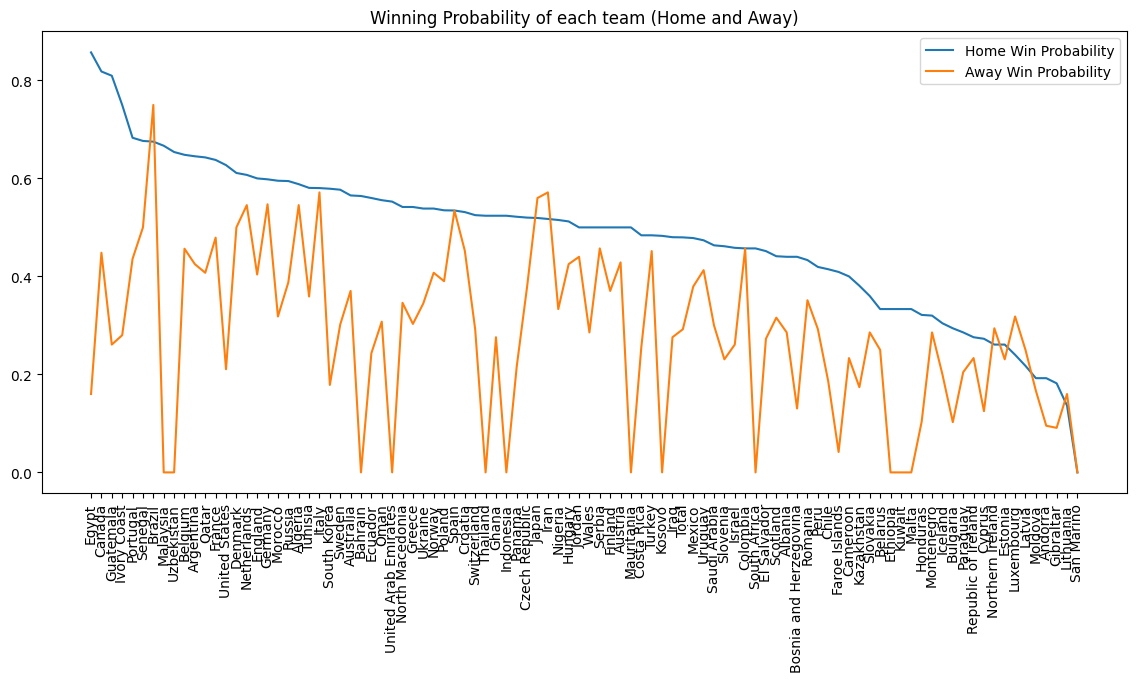

In [262]:
#Making a plot to identify wining possibilities in both home and away conditions

win_prob={teams_win_statues_100.iloc[i,:].name:[teams_win_statues_100.iloc[i,4]] for i in range(teams_win_statues_100.shape[0])}
for i in range(teams_away_statues_100.shape[0]):
    try:
        win_prob[teams_away_statues_100.iloc[i,:].name].append(teams_away_statues_100.iloc[i,4]) 
    except:
        pass
country_names=win_prob.keys()
lst_home=[i[0] for i in win_prob.values()]

lst_away=[]
for i in win_prob.values():
    if len(i)==2:
        lst_away.append(i[1])
    else:
        lst_away.append(0)

plt.figure(figsize=(14,6))
plt.plot(country_names,lst_home, label = "Home Win Probability")
plt.plot(country_names, lst_away, label = "Away Win Probability")
plt.xticks(rotation = 90)
plt.title("Winning Probability of each team (Home and Away)")
plt.legend()
plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'Unnamed: 0'),
  Text(1.5, 0, 'date'),
  Text(2.5, 0, 'home_team'),
  Text(3.5, 0, 'away_team'),
  Text(4.5, 0, 'home_score'),
  Text(5.5, 0, 'away_score'),
  Text(6.5, 0, 'tournament'),
  Text(7.5, 0, 'city'),
  Text(8.5, 0, 'country'),
  Text(9.5, 0, 'neutral'),
  Text(10.5, 0, 'target'),
  Text(11.5, 0, 'Win_Statues')])

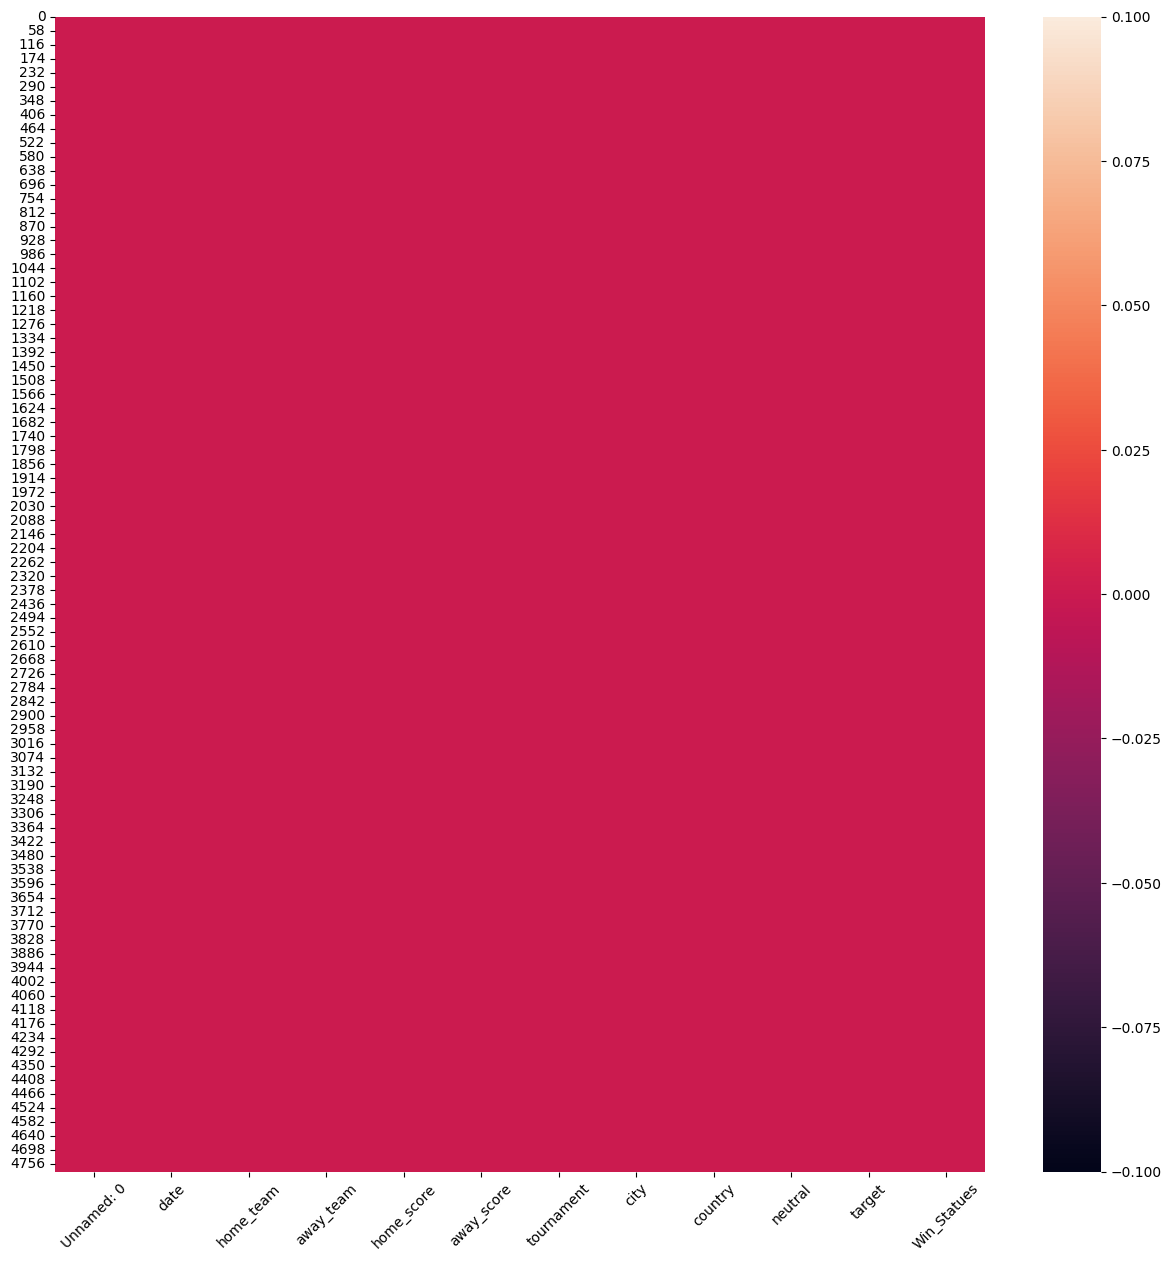

In [263]:
plt.figure(figsize=(15,15))
sns.heatmap(df.isnull())
plt.xticks(rotation=45)

In [264]:
df.nunique()

Unnamed: 0     4789
date            862
home_team       250
away_team       247
home_score       16
away_score       14
tournament       42
city            728
country         205
neutral           2
target            3
Win_Statues       3
dtype: int64

In [265]:
df['neutral'].unique()

array([ True, False])

# Data PerProcessing

In [266]:
df[["year", "month", "day"]] = df["date"].str.split("-", expand = True)

ValueError: Columns must be same length as key

In [185]:
df.drop('date', inplace=True, axis=1)
df.drop('month', inplace=True, axis=1)
df.drop('day', inplace=True, axis=1)


In [186]:
df["neutral"] = df["neutral"].astype(int)

In [187]:
df

,Unnamed: 0,home_team,away_team,home_score,away_score,tournament,city,country,neutral,target,Win_Statues,year
0,1311,Belgium,United States,0.0,3.0,FIFA World Cup,Montevideo,Uruguay,1,2,Lost,1930
1,1312,France,Mexico,4.0,1.0,FIFA World Cup,Montevideo,Uruguay,1,1,Win,1930
2,1313,Brazil,Yugoslavia,1.0,2.0,FIFA World Cup,Montevideo,Uruguay,1,2,Lost,1930
3,1314,Peru,Romania,1.0,3.0,FIFA World Cup,Montevideo,Uruguay,1,2,Lost,1930
4,1315,Argentina,France,1.0,0.0,FIFA World Cup,Montevideo,Uruguay,1,1,Win,1930
...,...,...,...,...,...,...,...,...,...,...,...,...
895,40293,Russia,Croatia,2.0,2.0,FIFA World Cup,Sochi,Russia,0,0,Draw,2018
896,40294,France,Belgium,1.0,0.0,FIFA World Cup,Saint Petersburg,Russia,1,1,Win,2018
897,40295,Croatia,England,2.0,1.0,FIFA World Cup,Moscow,Russia,1,1,Win,2018
898,40296,Belgium,England,2.0,0.0,FIFA World Cup,Saint Petersburg,Russia,1,1,Win,2018


C:\Users\mhhmd\AppData\Local\Temp\ipykernel_65824\3927812380.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot = True , cmap = "YlGnBu")


<AxesSubplot: >

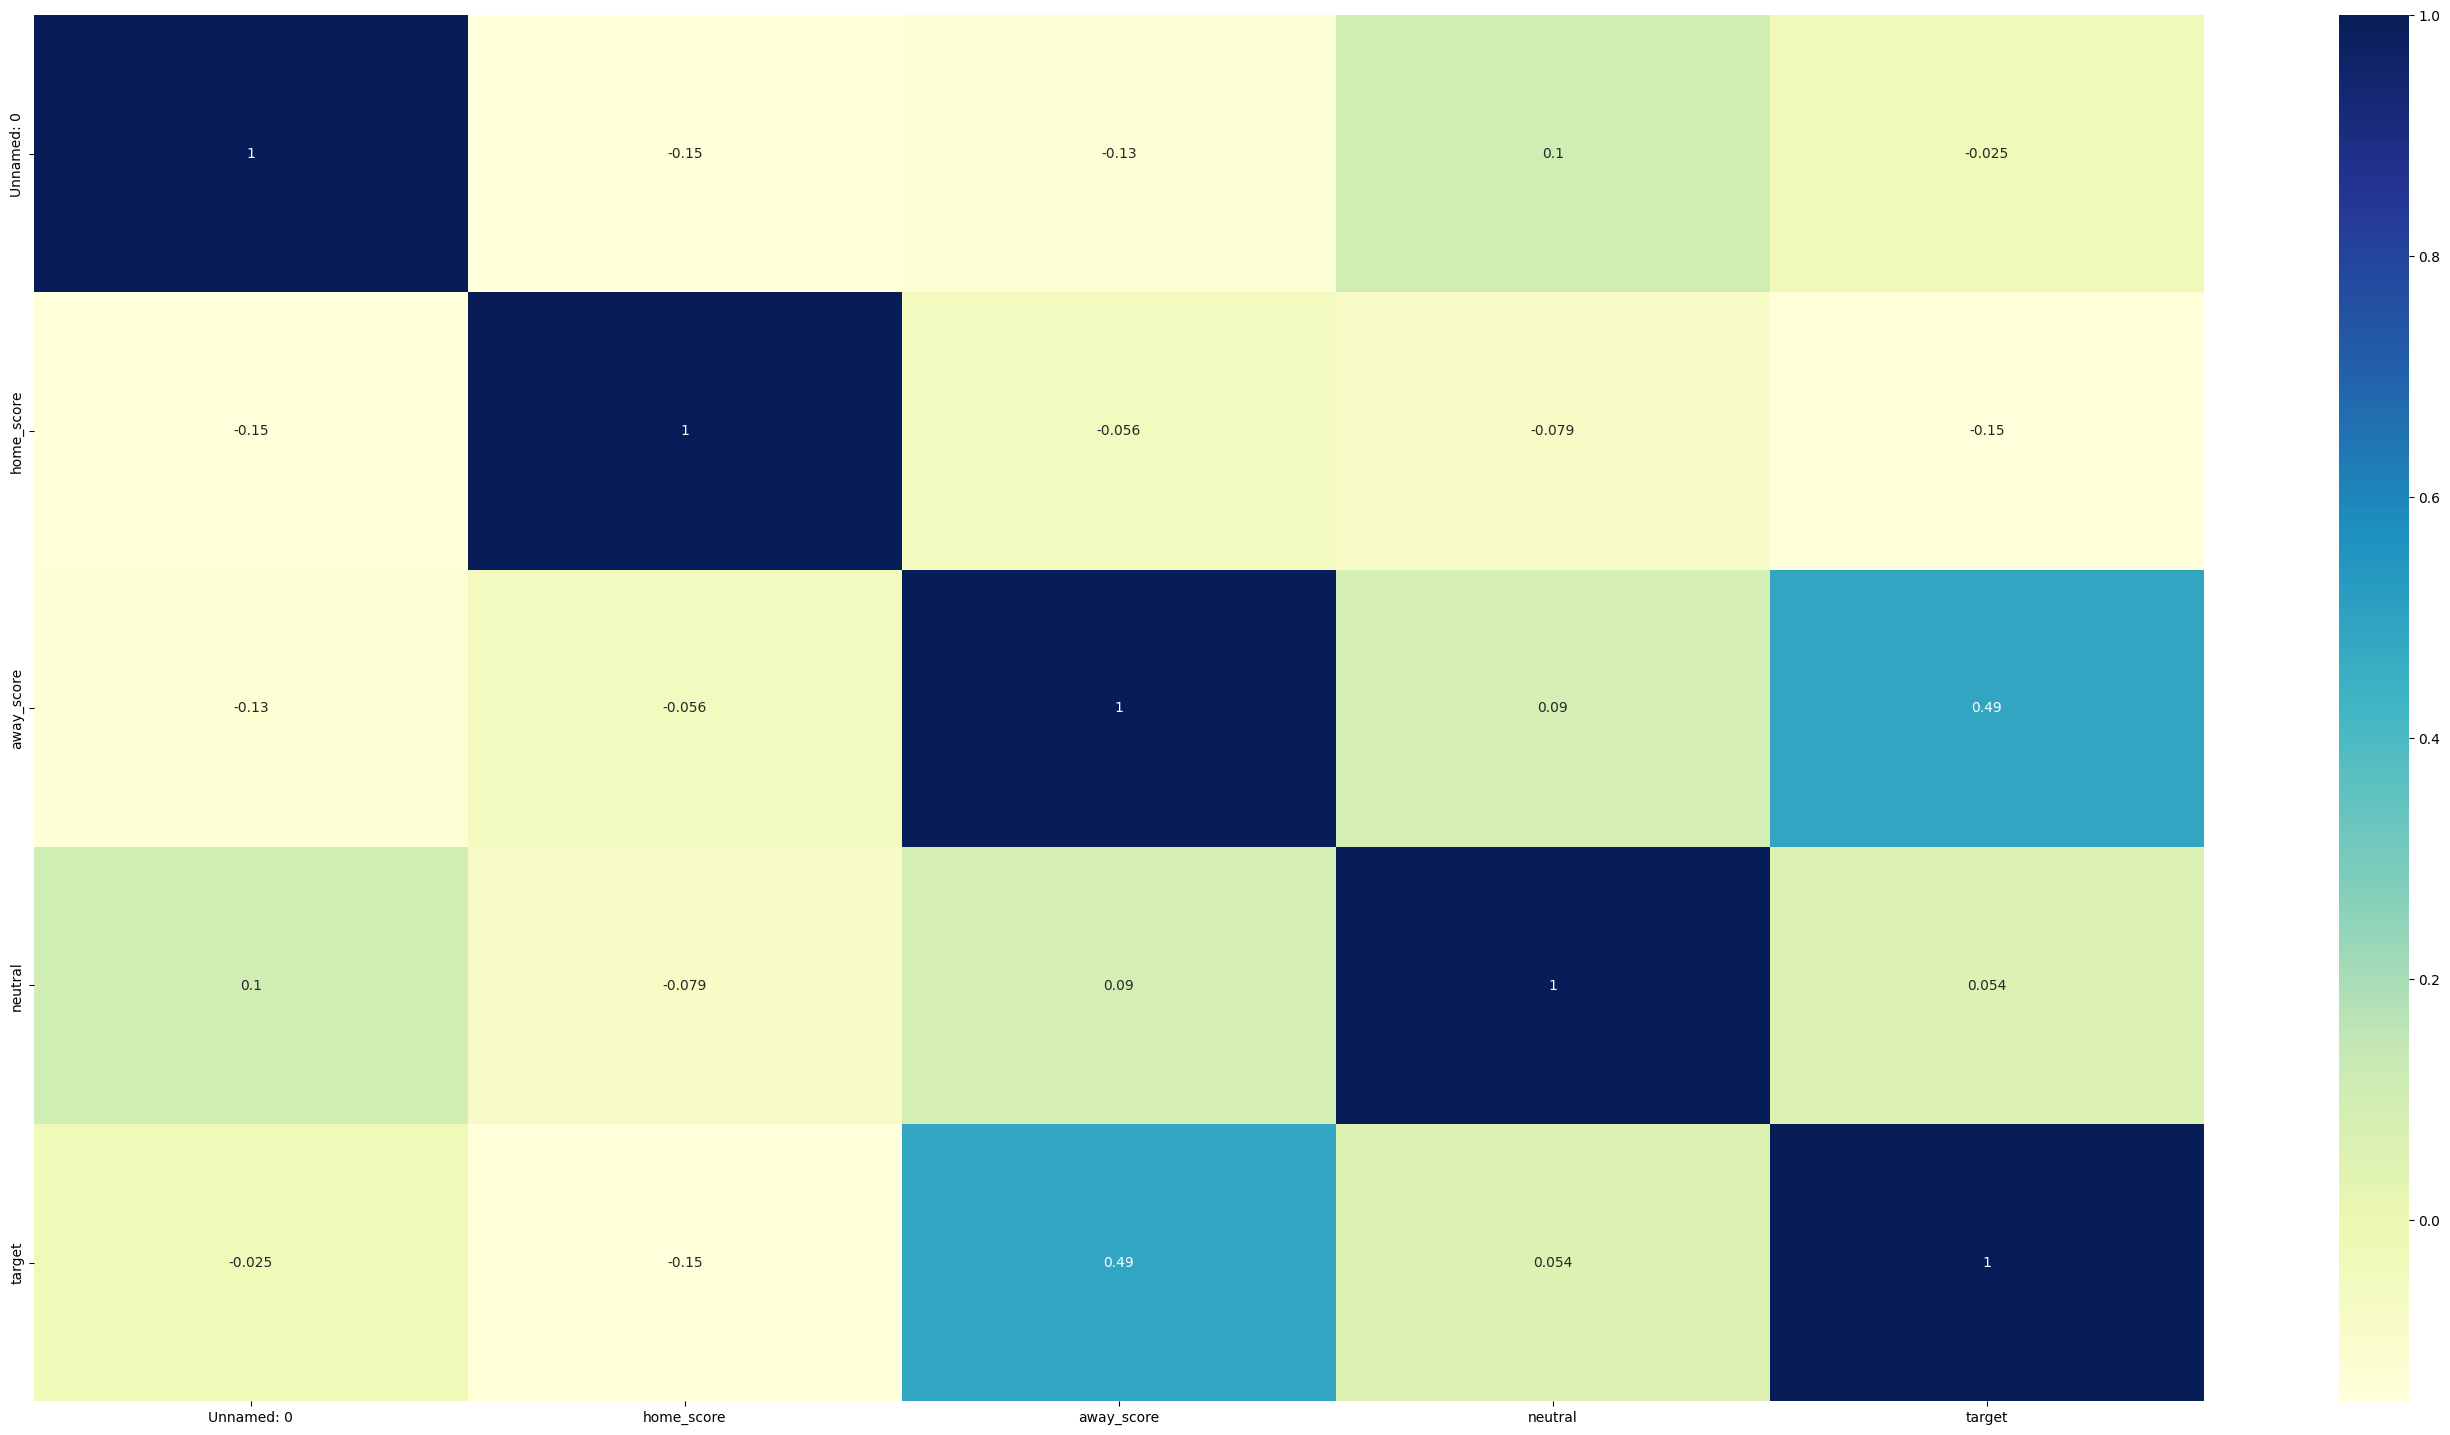

In [188]:
plt.figure(figsize = (35,18))
sns.heatmap(df.corr() , annot = True , cmap = "YlGnBu")

In [189]:
df_match=df.copy() #making a copy of the main dataframe for future use
df_match

,Unnamed: 0,home_team,away_team,home_score,away_score,tournament,city,country,neutral,target,Win_Statues,year
0,1311,Belgium,United States,0.0,3.0,FIFA World Cup,Montevideo,Uruguay,1,2,Lost,1930
1,1312,France,Mexico,4.0,1.0,FIFA World Cup,Montevideo,Uruguay,1,1,Win,1930
2,1313,Brazil,Yugoslavia,1.0,2.0,FIFA World Cup,Montevideo,Uruguay,1,2,Lost,1930
3,1314,Peru,Romania,1.0,3.0,FIFA World Cup,Montevideo,Uruguay,1,2,Lost,1930
4,1315,Argentina,France,1.0,0.0,FIFA World Cup,Montevideo,Uruguay,1,1,Win,1930
...,...,...,...,...,...,...,...,...,...,...,...,...
895,40293,Russia,Croatia,2.0,2.0,FIFA World Cup,Sochi,Russia,0,0,Draw,2018
896,40294,France,Belgium,1.0,0.0,FIFA World Cup,Saint Petersburg,Russia,1,1,Win,2018
897,40295,Croatia,England,2.0,1.0,FIFA World Cup,Moscow,Russia,1,1,Win,2018
898,40296,Belgium,England,2.0,0.0,FIFA World Cup,Saint Petersburg,Russia,1,1,Win,2018


In [190]:
#Making a new dataset with required features to train the machine learning model
#Year,Played Country,Team_1,team_2,team_1 score,team_2 score

New_Dataset_part_1=pd.DataFrame(list(zip(years,df_match.values[:,7],df_match.values[:,1],df_match.values[:,2],df_match.values[:,3],df_match.values[:,4])),columns=["year","Country","team_1","team_2","team_1_score","team_2_score"])
#Making a new dataset by changing the team_1 and team_2 and their respective scores
New_Dataset_part_2=pd.DataFrame(list(zip(years,df_match.values[:,7],df_match.values[:,2],df_match.values[:,1],df_match.values[:,4],df_match.values[:,3])),columns=["year","Country","team_1","team_2","team_1_score","team_2_score"])
New_Dataset=pd.concat([New_Dataset_part_1,New_Dataset_part_2],axis=0)
New_Dataset =New_Dataset.sample(frac=1).reset_index(drop=True) #Shaffling the dataset
New_Dataset.head(5)

,year,Country,team_1,team_2,team_1_score,team_2_score
0,2014,Brazil,Argentina,Belgium,1.0,0.0
1,1974,Germany,Yugoslavia,DR Congo,9.0,0.0
2,2002,Japan,Germany,Cameroon,2.0,0.0
3,1978,Argentina,Italy,Germany,0.0,0.0
4,2010,South Africa,New Zealand,Slovakia,1.0,1.0


In [191]:
#Creating a list containg all the names of the countries

teams_1=New_Dataset.team_1.unique()
contries=New_Dataset.Country.unique()
all_countries=np.unique(np.concatenate((teams_1,contries), axis=0))
len(all_countries)

81

C:\Users\mhhmd\AppData\Local\Temp\ipykernel_65824\3716185662.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(New_Dataset.corr())
C:\Users\mhhmd\AppData\Local\Temp\ipykernel_65824\3716185662.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  New_Dataset.corr()


,year,team_1_score,team_2_score
year,1.000000,-0.174612,-0.174612
team_1_score,-0.174612,1.000000,-0.066543
team_2_score,-0.174612,-0.066543,1.000000


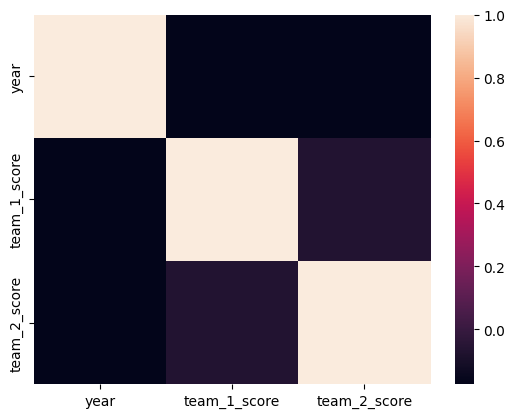

In [192]:
#Making a heatmap to see the correlation of each columns 

sns.heatmap(New_Dataset.corr())
New_Dataset.corr()

In [197]:
#Defining the features and labels(Targets)

Y= New_Dataset.iloc[:,4:6] #Training targets (team_1_score and team_2_score)
categorized_data=New_Dataset.iloc[:,0:4].copy() #Traing features

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#Labeling the data using LabelEncorder in Sklearn-(Giving a unique number to each string(country))

label_encoder.fit(all_countries)
#list(label_encoder.classes_)
categorized_data['team_1']=label_encoder.transform(categorized_data['team_1'])
categorized_data['team_2']=label_encoder.transform(categorized_data['team_2'])
categorized_data['Country']=label_encoder.transform(categorized_data['Country'])

#Converting these feature columns to categrize form to make the training processs more smoother
categorized_data['team_1']=categorized_data['team_1'].astype("category")
categorized_data['team_2']=categorized_data['team_2'].astype("category")
categorized_data['Country']=categorized_data['team_2'].astype("category")

In [198]:
home_team_encoder = preprocessing.LabelEncoder()
df['home_team'] = home_team_encoder.fit_transform(df['home_team'])


away_team_encoder = preprocessing.LabelEncoder()
df['away_team'] = away_team_encoder.fit_transform(df['away_team'])


city_encoder = preprocessing.LabelEncoder()
df['city'] = city_encoder.fit_transform(df['city'])


country_encoder = preprocessing.LabelEncoder()
df['country'] = country_encoder.fit_transform(df['country'])



In [199]:
df.head()

,Unnamed: 0,home_team,away_team,home_score,away_score,tournament,city,country,neutral,target,Win_Statues,year
0,1311,5,75,0.0,3.0,FIFA World Cup,83,16,1,2,Lost,1930
1,1312,26,42,4.0,1.0,FIFA World Cup,83,16,1,1,Win,1930
2,1313,8,78,1.0,2.0,FIFA World Cup,83,16,1,2,Lost,1930
3,1314,52,56,1.0,3.0,FIFA World Cup,83,16,1,2,Lost,1930
4,1315,2,25,1.0,0.0,FIFA World Cup,83,16,1,1,Win,1930


In [200]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop('tournament', inplace=True, axis=1)
df.drop('Win_Statues', inplace=True, axis=1)

In [201]:
df_clean = df.copy()
df_clean.to_csv('fifa world cup clean.csv', encoding='utf-8',  index=False)



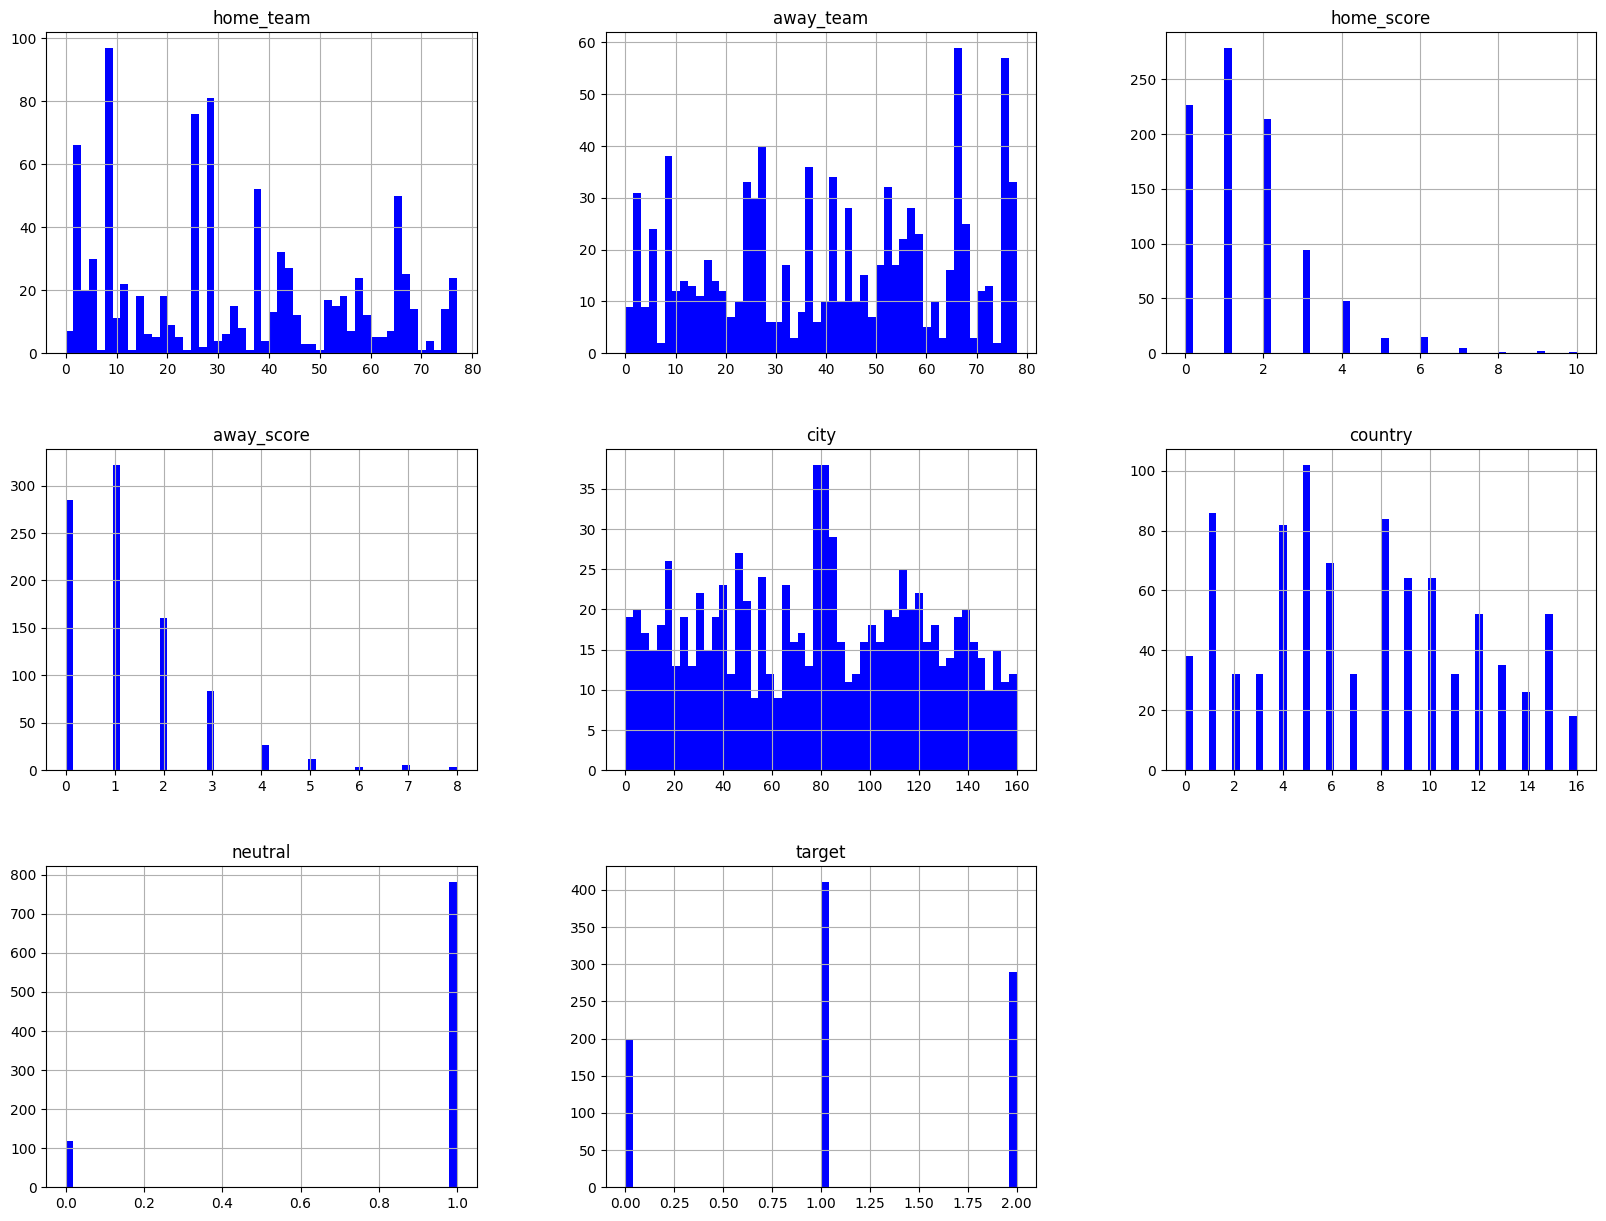

In [202]:
df.hist(bins=50, figsize=(20,15), color='b')
plt.show()

# Split data and target

In [203]:
x = df.drop(['target'],axis=1).values
y = df['target'].values

In [204]:
#Defining the features and labels(Targets)

Y= New_Dataset.iloc[:,4:6] #Training targets (team_1_score and team_2_score)
categorized_data=New_Dataset.iloc[:,0:4].copy() #Traing features
X=categorized_data

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#Labeling the data using LabelEncorder in Sklearn-(Giving a unique number to each string(country))

label_encoder.fit(all_countries)
#list(label_encoder.classes_)
categorized_data['team_1']=label_encoder.transform(categorized_data['team_1'])
categorized_data['team_2']=label_encoder.transform(categorized_data['team_2'])
categorized_data['Country']=label_encoder.transform(categorized_data['Country'])

#Converting these feature columns to categrize form to make the training processs more smoother
categorized_data['team_1']=categorized_data['team_1'].astype("category")
categorized_data['team_2']=categorized_data['team_2'].astype("category")
categorized_data['Country']=categorized_data['team_2'].astype("category")

# Scaling Data

In [205]:
sd_scaler = StandardScaler()
x = sd_scaler.fit_transform(x)

In [206]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, shuffle=True, random_state=0)

In [207]:
print ("x train shape",x_train.shape)
print ("y train shape",y_train.shape)
print ("x test shape",x_test.shape)
print ("y test shape",x_test.shape)

x train shape (630, 8)
y train shape (630,)
x test shape (270, 8)
y test shape (270, 8)


# Random Forest Model

In [208]:
rf = RandomForestClassifier(criterion='entropy',n_estimators=20)
rf.fit(x_train, y_train)
rf.score(x_train,y_train)

1.0

# Random Forest Evaluation

In [209]:
y_pred = rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.9666666666666667


In [210]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92        62
           1       0.98      0.99      0.98       131
           2       0.94      1.00      0.97        77

    accuracy                           0.97       270
   macro avg       0.97      0.95      0.96       270
weighted avg       0.97      0.97      0.97       270



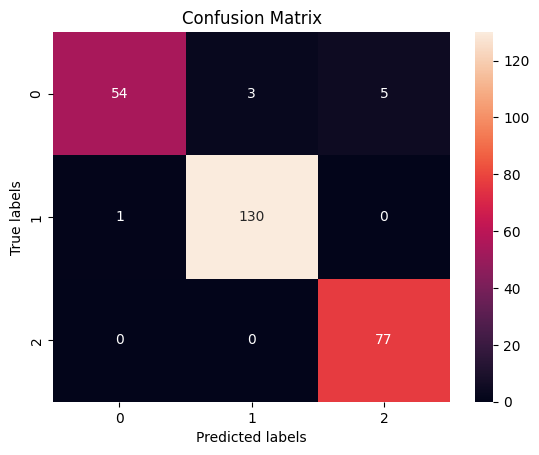

In [211]:
rf = confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(rf, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

# Decision Tree Model

In [212]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(x_train, y_train)
dt_clf.score(x_train,y_train)


0.9952380952380953

# Decision Tree Evaluation

In [213]:
y_pred = dt_clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.9814814814814815


In [214]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        62
           1       1.00      0.99      1.00       131
           2       0.94      1.00      0.97        77

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg       0.98      0.98      0.98       270



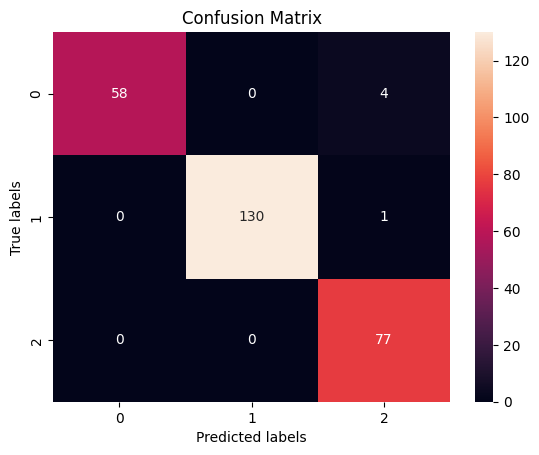

In [215]:
cm = confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

# KNN Model

In [216]:
from sklearn.neighbors import KNeighborsClassifier

In [217]:
knn = KNeighborsClassifier(n_neighbors=15)

# KNN Evaluation

In [218]:
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.807936507936508

In [219]:
knn_pred = knn.predict(x_test)
print("Accuracy",accuracy_score(y_test,knn_pred))

Accuracy 0.7962962962962963


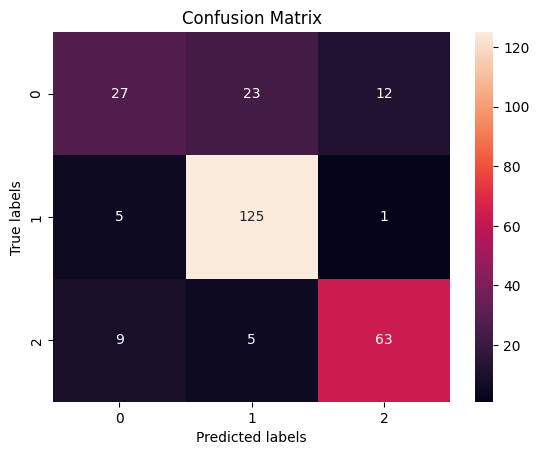

In [220]:
cm = confusion_matrix(y_test,knn_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


In [221]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.66      0.44      0.52        62
           1       0.82      0.95      0.88       131
           2       0.83      0.82      0.82        77

    accuracy                           0.80       270
   macro avg       0.77      0.74      0.74       270
weighted avg       0.78      0.80      0.78       270



In [222]:
# We have choose RandomForestClassifier Algorithm
X=categorized_data
from sklearn.multioutput import MultiOutputRegressor

model = MultiOutputRegressor(RandomForestClassifier(criterion='entropy',n_estimators=20))
model.fit(X,Y)

MultiOutputRegressor(estimator=RandomForestClassifier(criterion='entropy',
                                                      n_estimators=20))

In [223]:
#Making the predictions

prd=model.predict(X)
prd

array([[1., 0.],
       [9., 0.],
       [2., 0.],
       ...,
       [0., 0.],
       [1., 3.],
       [1., 1.]])

In [224]:
#Creating the Confusion matrix for each predictions

score_team_1=[i[0] for i in prd]
score_team_2=[i[1] for i in prd]

from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(list(Y.iloc[:,0]),score_team_1)
cm2=confusion_matrix(list(Y.iloc[:,1]),score_team_2)

Text(220.72222222222223, 0.5, 'Predicted')

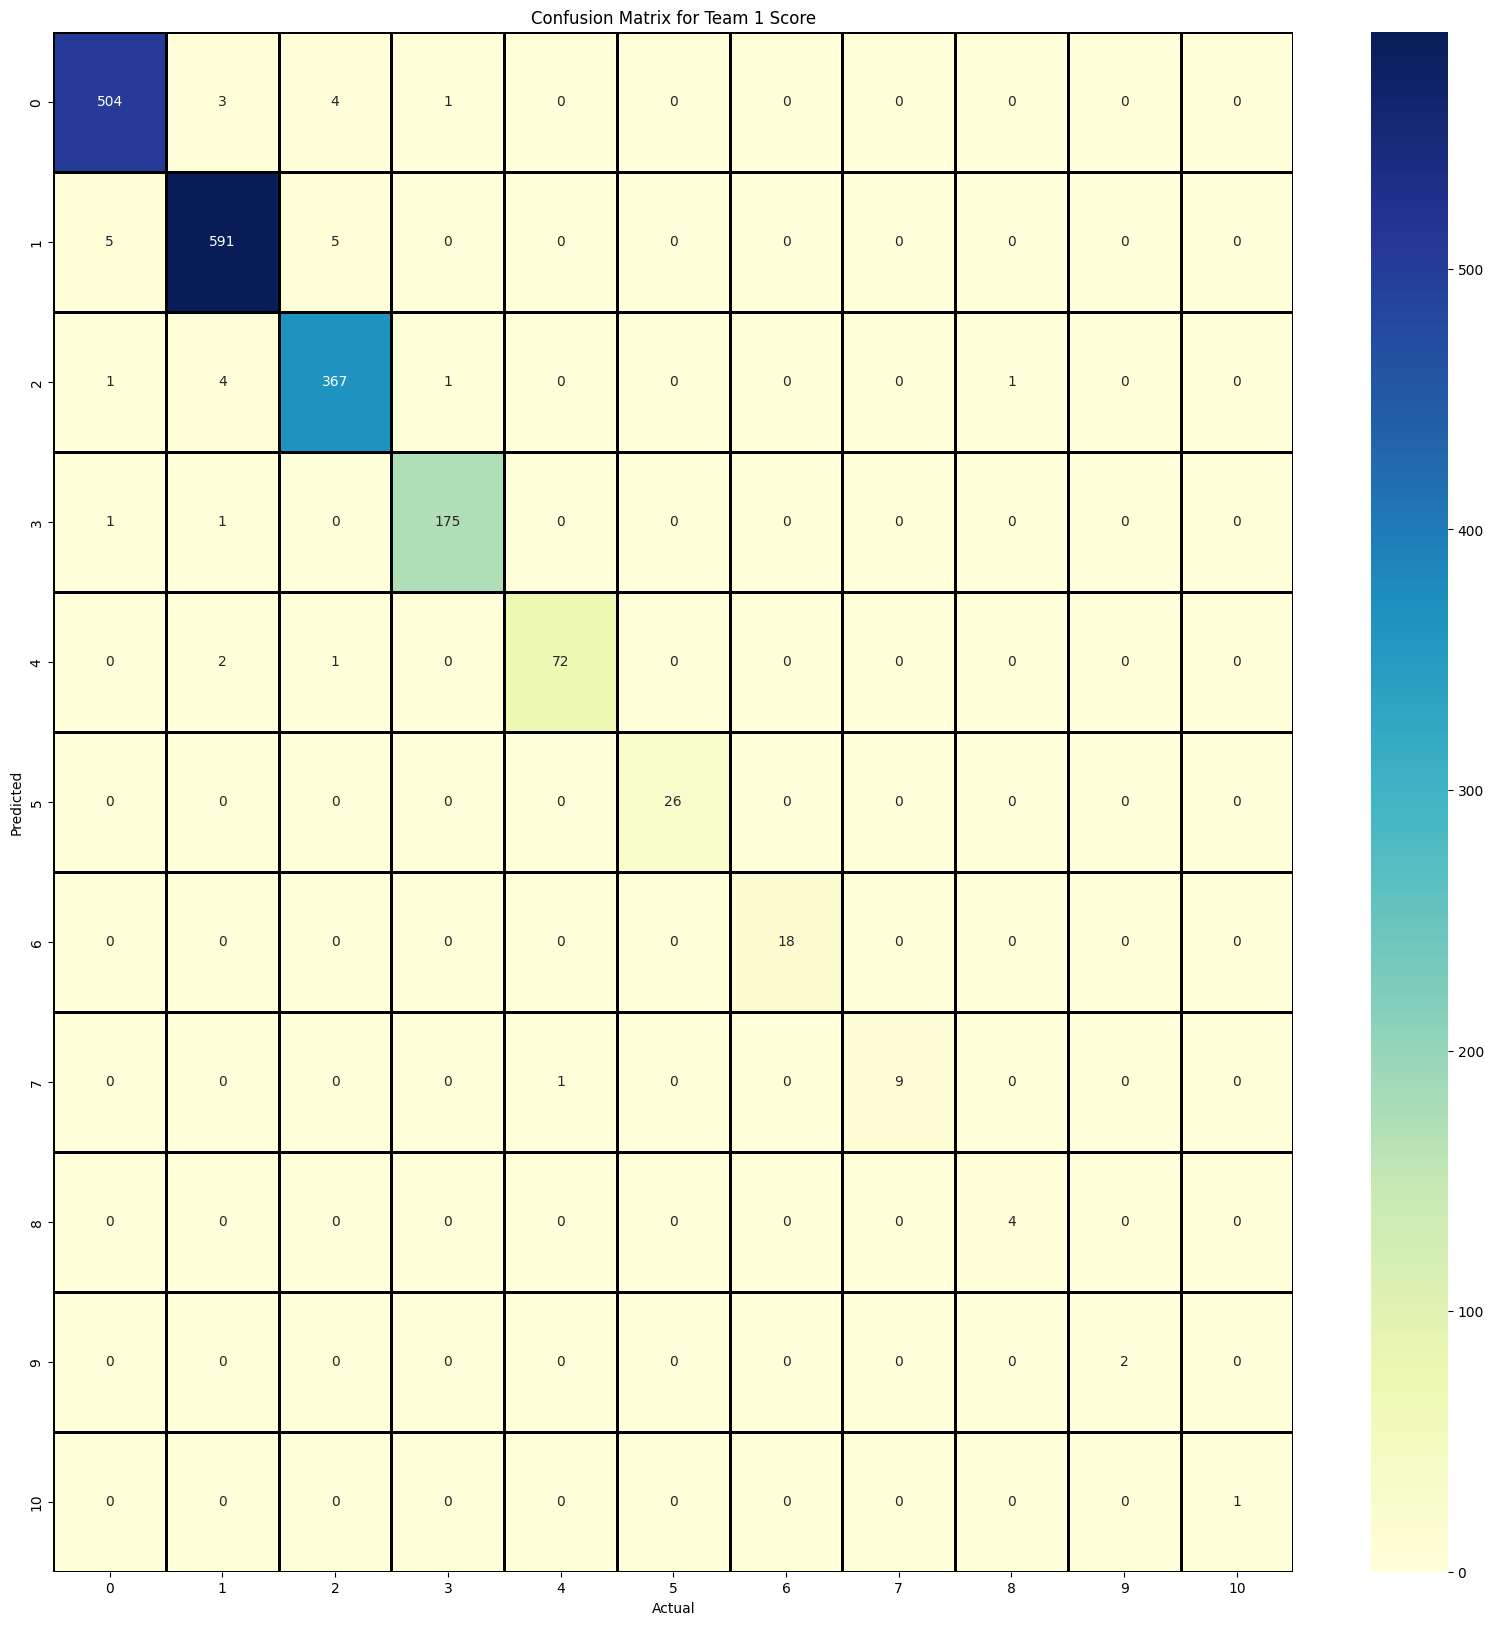

In [225]:
#Plotting the Confussion Matrix for score of team 01

plt.figure(figsize=(20,20))
sns.heatmap(cm1, annot=True,fmt="d", cmap='YlGnBu', linecolor='black', linewidths=1)
plt.title("Confusion Matrix for Team 1 Score")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [226]:
#Classification Report to team 1 Score

from sklearn.metrics import classification_report
report_1=classification_report(Y.iloc[:,0],score_team_1)
print(report_1)

#Has a good Accuracy in predicting the team 1 Score

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       512
         1.0       0.98      0.98      0.98       601
         2.0       0.97      0.98      0.98       374
         3.0       0.99      0.99      0.99       177
         4.0       0.99      0.96      0.97        75
         5.0       1.00      1.00      1.00        26
         6.0       1.00      1.00      1.00        18
         7.0       1.00      0.90      0.95        10
         8.0       0.80      1.00      0.89         4
         9.0       1.00      1.00      1.00         2
        10.0       1.00      1.00      1.00         1

    accuracy                           0.98      1800
   macro avg       0.97      0.98      0.98      1800
weighted avg       0.98      0.98      0.98      1800



Text(220.72222222222223, 0.5, 'Predicted')

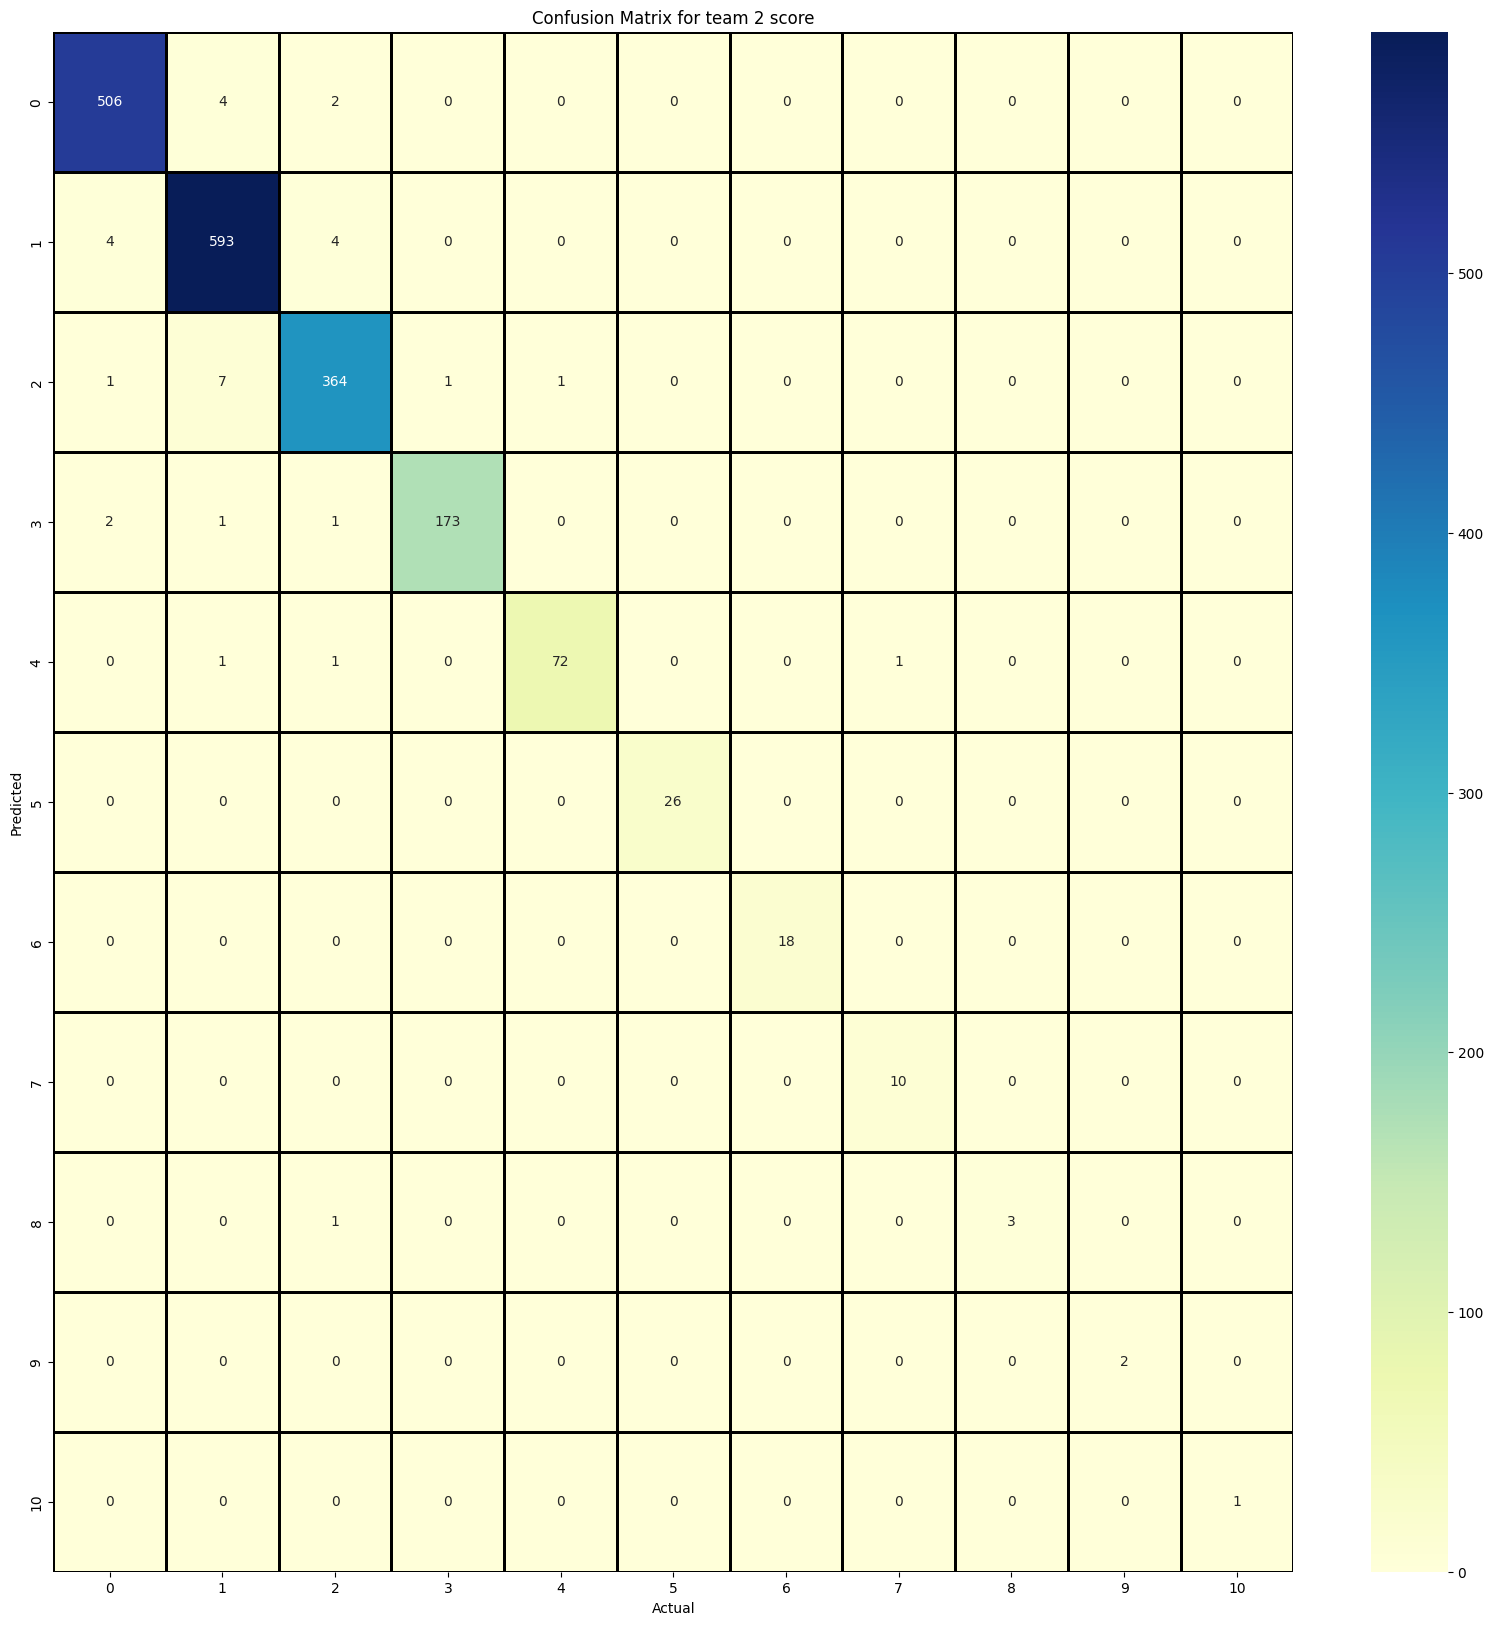

In [227]:
#Plotting the Confussion Matrix for score of team 02

plt.figure(figsize=(20,20))
sns.heatmap(cm2, annot=True,fmt="d", cmap='YlGnBu', linecolor='black', linewidths=1)
plt.title("Confusion Matrix for team 2 score")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [228]:
#Classification Report to team 2 Score

report_2=classification_report(Y.iloc[:,1],score_team_2)
print(report_2)

#Has a good Accuracy in predicting the team 1 Score#

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       512
         1.0       0.98      0.99      0.98       601
         2.0       0.98      0.97      0.97       374
         3.0       0.99      0.98      0.99       177
         4.0       0.99      0.96      0.97        75
         5.0       1.00      1.00      1.00        26
         6.0       1.00      1.00      1.00        18
         7.0       0.91      1.00      0.95        10
         8.0       1.00      0.75      0.86         4
         9.0       1.00      1.00      1.00         2
        10.0       1.00      1.00      1.00         1

    accuracy                           0.98      1800
   macro avg       0.98      0.97      0.97      1800
weighted avg       0.98      0.98      0.98      1800



In [229]:
#Fuction to Select the winning team for the prediction array

def select_winning_team(probability_array):
    prob_lst=[round(probability_array[0][i],3) for i in range(2)]
    if (prob_lst[0]>prob_lst[1]):
        out=0
    elif (prob_lst[0]<prob_lst[1]):
        out=1
    elif (prob_lst[0]==prob_lst[1]):
        out=2
    return out,prob_lst

In [230]:
#Sample Prediction

mactch_played=2015
team_1="Serbia"
team_2="Brazil"
stadium="Russia"

team_lst=[team_1,team_2]
team_1_num=label_encoder.transform([team_1])[0]
team_2_num=label_encoder.transform([team_2])[0]
stadium_num=label_encoder.transform([stadium])[0]

print(f"Team 01 is {team_1} -{team_1_num}")
print(f"Team 02 is {team_2} -{team_2_num}")
print(f"Played in  {stadium} -{stadium_num}")

Team 01 is Serbia -63
Team 02 is Brazil -8
Played in  Russia -59


In [231]:
#Sample Prediction Output

X_feature=np.array([[mactch_played,stadium_num,team_1_num,team_2_num]])
res=model.predict(X_feature)
win,_=select_winning_team(res)
try:
    print(f"{team_1} vs {team_2} \n {team_lst[win]} wins 🏆⚽🎯\n")
except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽⚽\n") 

Serbia vs Brazil 
 Brazil wins 🏆⚽🎯



C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [232]:
Group_A= ["Ecuador","Senegal","Netherlands"]
Group_B= ["England","Iran","United States","Wales"]
Group_C= ["Argentina","Saudi Arabia","Mexico","Poland"]
Group_D= ["France","Australia","Denmark","Tunisia"]
Group_E= ["Spain","Costa Rica","Germany","Japan"]
Group_F= ["Belgium","Canada","Morocco","Croatia"]
Group_G= ["Brazil","Serbia","Switzerland","Cameroon"]
Group_H= ["Portugal","Ghana","Uruguay","South Korea"]
Groups={"Group A":Group_A,"Group B":Group_B,"Group C":Group_C,"Group D":Group_D,
"Group E":Group_E,"Group F":Group_F,"Group G":Group_G,"Group H":Group_H}

In [233]:
#Initialize basic parameters

year=2022
stadium="Russia"
stadium_num=label_encoder.transform([stadium])[0]
host_num=stadium_num

In [234]:
##Group stage Matches

Group_standings={}
for grp_name in list(Groups.keys()):
    print(f"{grp_name} Matches")
    probable_countries=Groups[grp_name]
    team_wins_dct={}
    goal_scored_dct={}
    goal_against_dct={}
    win_dct={}
    draw_dct={}
    lost_dct={}
    for i in range(len(probable_countries)):
        j=i+1
        team_1=probable_countries[i]
        team_1_num=label_encoder.transform([team_1])[0]
        team_wins=0
        while j<len((probable_countries)):
            team_2=probable_countries[j]
            team_2_num=label_encoder.transform([team_2])[0]
            team_lst=[team_1,team_2]
            Input_vector=np.array([[year,stadium_num,team_1_num,team_2_num]])
            res=model.predict(Input_vector)

            win,prob_lst=select_winning_team(res)
            goal_scored_dct[team_1] = goal_scored_dct.get(team_1,0)+prob_lst[0]
            goal_scored_dct[team_2] = goal_scored_dct.get(team_2,0)+prob_lst[1]

            goal_against_dct[team_1] = goal_against_dct.get(team_1,0)+prob_lst[1]
            goal_against_dct[team_2] = goal_against_dct.get(team_2,0)+prob_lst[0]

            try:
                print(f" {team_1} vs {team_2} \n  Results of the Match {res[0]}\n   {team_lst[win]} wins 🎊🏆⚽🎖️\n")
                if (win)==0:
                    team_wins_dct[team_1] = team_wins_dct.get(team_1,0)+2
                    team_wins_dct[team_2] = team_wins_dct.get(team_2,0)
                    
                    win_dct[team_1] = win_dct.get(team_1,0)+1
                    win_dct[team_2] = win_dct.get(team_2,0)
                    lost_dct[team_2] = lost_dct.get(team_2,0)+1
                    lost_dct[team_1] = lost_dct.get(team_1,0)
                    draw_dct[team_2] = draw_dct.get(team_2,0)
                    draw_dct[team_1] = draw_dct.get(team_1,0)

                elif (win)==1:
                    team_wins_dct[team_2] = team_wins_dct.get(team_2,0)+2
                    team_wins_dct[team_1] = team_wins_dct.get(team_1,0)
                    
                    win_dct[team_2] = win_dct.get(team_2,0)+1
                    win_dct[team_1] = win_dct.get(team_1,0)
                    lost_dct[team_1] = lost_dct.get(team_1,0)+1
                    lost_dct[team_2] = lost_dct.get(team_2,0)
                    draw_dct[team_1] = draw_dct.get(team_1,0)
                    draw_dct[team_2] = draw_dct.get(team_2,0)

            except IndexError:
                print(f"{team_1} vs {team_2} \n  Results of the Match {res[0]}\n   Match Draw ⚽⚽⚽\n") 
                team_wins_dct[team_1] = team_wins_dct.get(team_1,0)+1
                team_wins_dct[team_2] = team_wins_dct.get(team_2,0)+1
                
                draw_dct[team_1] = draw_dct.get(team_1,0)+1
                draw_dct[team_2] = draw_dct.get(team_2,0)+1
                
                win_dct[team_1] = win_dct.get(team_1,0)
                lost_dct[team_1] = lost_dct.get(team_1,0)
                
                win_dct[team_2] = win_dct.get(team_2,0)
                lost_dct[team_2] = lost_dct.get(team_2,0)
                    
            j=j+1
    group_results=[win_dct,draw_dct,lost_dct,team_wins_dct,goal_scored_dct,goal_against_dct]
    Group_standings[grp_name]=group_results

Group A Matches
 Ecuador vs Senegal 
  Results of the Match [1. 3.]
   Senegal wins 🎊🏆⚽🎖️

 Ecuador vs Netherlands 
  Results of the Match [1. 0.]
   Ecuador wins 🎊🏆⚽🎖️

 Senegal vs Netherlands 
  Results of the Match [0. 1.]
   Netherlands wins 🎊🏆⚽🎖️

Group B Matches
England vs Iran 
  Results of the Match [1. 1.]
   Match Draw ⚽⚽⚽

 England vs United States 
  Results of the Match [1. 2.]
   United States wins 🎊🏆⚽🎖️

 England vs Wales 
  Results of the Match [1. 2.]
   Wales wins 🎊🏆⚽🎖️

 Iran vs United States 
  Results of the Match [1. 2.]
   United States wins 🎊🏆⚽🎖️

Iran vs Wales 
  Results of the Match [1. 1.]
   Match Draw ⚽⚽⚽

 United States vs Wales 
  Results of the Match [1. 0.]
   United States wins 🎊🏆⚽🎖️

Group C Matches
 Argentina vs Saudi Arabia 
  Results of the Match [1. 0.]
   Argentina wins 🎊🏆⚽🎖️

 Argentina vs Mexico 
  Results of the Match [2. 0.]
   Argentina wins 🎊🏆⚽🎖️

 Argentina vs Poland 
  Results of the Match [1. 0.]
   Argentina wins 🎊🏆⚽🎖️

 Saudi Arabia vs

C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\b

Canada vs Croatia 
  Results of the Match [1. 1.]
   Match Draw ⚽⚽⚽

 Morocco vs Croatia 
  Results of the Match [1. 0.]
   Morocco wins 🎊🏆⚽🎖️

Group G Matches
 Brazil vs Serbia 
  Results of the Match [1. 0.]
   Brazil wins 🎊🏆⚽🎖️

 Brazil vs Switzerland 
  Results of the Match [1. 0.]
   Brazil wins 🎊🏆⚽🎖️

 Brazil vs Cameroon 
  Results of the Match [2. 0.]
   Brazil wins 🎊🏆⚽🎖️

 Serbia vs Switzerland 
  Results of the Match [0. 1.]
   Switzerland wins 🎊🏆⚽🎖️

 Serbia vs Cameroon 
  Results of the Match [2. 1.]
   Serbia wins 🎊🏆⚽🎖️

 Switzerland vs Cameroon 
  Results of the Match [1. 2.]
   Cameroon wins 🎊🏆⚽🎖️

Group H Matches
 Portugal vs Ghana 
  Results of the Match [0. 1.]
   Ghana wins 🎊🏆⚽🎖️

 Portugal vs Uruguay 
  Results of the Match [1. 2.]
   Uruguay wins 🎊🏆⚽🎖️

 Portugal vs South Korea 
  Results of the Match [0. 2.]
   South Korea wins 🎊🏆⚽🎖️

 Ghana vs Uruguay 
  Results of the Match [1. 2.]
   Uruguay wins 🎊🏆⚽🎖️

 Ghana vs South Korea 
  Results of the Match [1. 2.]
   So

C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\b

In [235]:
#Display group stage results

for grp_name in list(Group_standings.keys()):

    team_wins_dct= dict(sorted(Group_standings[grp_name][3].items()))
    goal_scored_dct=dict(sorted(Group_standings[grp_name][4].items()))
    goal_against_dct=dict(sorted(Group_standings[grp_name][5].items()))
    
    win_dct=dict(sorted(Group_standings[grp_name][0].items()))
    draw_dct=dict(sorted(Group_standings[grp_name][1].items()))
    lost_dct=dict(sorted(Group_standings[grp_name][2].items()))
    
    lst_teams=list(team_wins_dct.keys())
    
    win_lst=list(win_dct.values())
    draw_lst=list(draw_dct.values())
    lost_lst=list(lost_dct.values())
    
    lst_win_count=list(team_wins_dct.values())
    goal_scored=list(goal_scored_dct.values())
    goal_against=list(goal_against_dct.values())
    goal_differance=[goal_scored[i]-goal_against[i] for i in range (len(goal_scored))]
    ranking_table=pd.DataFrame(list(zip(lst_teams,win_lst,draw_lst,lost_lst,goal_scored,goal_against,goal_differance,lst_win_count)),columns=["Team","Wins","Draw","Lost","Goal Scored","Goal Against","Goal Differance","Points"])
    ranking_table=ranking_table.sort_values("Points",ascending=False).reset_index(drop=True)
    ranking_table.index = ranking_table.index + 1
    print(f"\n\n{grp_name} Final Rankings")
    print(ranking_table.to_markdown())



Group A Final Rankings
|    | Team        |   Wins |   Draw |   Lost |   Goal Scored |   Goal Against |   Goal Differance |   Points |
|---:|:------------|-------:|-------:|-------:|--------------:|---------------:|------------------:|---------:|
|  1 | Ecuador     |      1 |      0 |      1 |             2 |              3 |                -1 |        2 |
|  2 | Netherlands |      1 |      0 |      1 |             1 |              1 |                 0 |        2 |
|  3 | Senegal     |      1 |      0 |      1 |             3 |              2 |                 1 |        2 |


Group B Final Rankings
|    | Team          |   Wins |   Draw |   Lost |   Goal Scored |   Goal Against |   Goal Differance |   Points |
|---:|:--------------|-------:|-------:|-------:|--------------:|---------------:|------------------:|---------:|
|  1 | United States |      3 |      0 |      0 |             5 |              2 |                 3 |        6 |
|  2 | Wales         |      1 |      1 |      1 

In [236]:
##Round of 16 Section_1

qualified_teams_1=[]
standings=list(Group_standings.keys())
i=0
print(f"Round of 16\n")
while i < (len(standings)):
    A_team= sorted(Group_standings[standings[i]][3].items(), key=lambda x: x[1], reverse=True)
    team_1=A_team[0][0]
    B_team= sorted(Group_standings[standings[i+1]][3].items(), key=lambda x: x[1], reverse=True)
    team_2=B_team[1][0]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_1.append(team_lst[win])
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_1.append(winning_team)
    i=i+2
    
##Round of 16 Section_2
qualified_teams_2=[]
standings=list(Group_standings.keys())
i=0
while i < (len(standings)):
    A_team= sorted(Group_standings[standings[i]][3].items(), key=lambda x: x[1], reverse=True)
    team_1=A_team[1][0]
    B_team= sorted(Group_standings[standings[i+1]][3].items(), key=lambda x: x[1], reverse=True)
    team_2=B_team[0][0]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_2.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_2.append(winning_team)
    i=i+2

Round of 16

Senegal vs Wales 
  Wales wins 🏆🏆
    Wales into the Quater-Finals ⏩⏩ 

Argentina vs Australia 
  Argentina wins 🏆🏆
    Argentina into the Quater-Finals ⏩⏩ 

Japan vs Canada 
  Japan wins 🏆🏆
    Japan into the Quater-Finals ⏩⏩ 

Brazil vs South Korea 
  Brazil wins 🏆🏆
    Brazil into the Quater-Finals ⏩⏩ 

Ecuador vs United States 
  United States wins 🏆🏆
    United States into the Quater-Finals ⏩⏩ 

Poland vs Tunisia 
  Tunisia wins 🏆🏆
    Tunisia into the Quater-Finals ⏩⏩ 

Spain vs Belgium 
  Belgium wins 🏆🏆
    Belgium into the Quater-Finals ⏩⏩ 

Serbia vs Uruguay 
  Uruguay wins 🏆🏆
    Uruguay into the Quater-Finals ⏩⏩ 



C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\b

In [237]:
print(f"Teams selected to the Quater Finals - {qualified_teams_1+qualified_teams_2}")

Teams selected to the Quater Finals - ['Wales', 'Argentina', 'Japan', 'Brazil', 'United States', 'Tunisia', 'Belgium', 'Uruguay']


In [238]:
#Quarter Finals

Semifinal_teams=[]
i=0
print(f"Quater Final Matches\n")
while i < (len(qualified_teams_1))-1:
    team_1= qualified_teams_1[i]
    team_2= qualified_teams_1[i+1]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽")
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(winning_team)
    i=i+2
    
i=0
while i < (len(qualified_teams_2))-1:
    team_1= qualified_teams_2[i]
    team_2= qualified_teams_2[i+1]
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(winning_team)
    i=i+2

Quater Final Matches

Wales vs Argentina 
  Wales wins 🏆🏆
    Wales into the Semi-Finals ⏩⏩ 

Japan vs Brazil 
  Japan wins 🏆🏆
    Japan into the Semi-Finals ⏩⏩ 

United States vs Tunisia 
  United States wins 🏆🏆
    United States into the Semi-Finals ⏩⏩ 

Belgium vs Uruguay 
  Uruguay wins 🏆🏆
    Uruguay into the Semi-Finals ⏩⏩ 



C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\b

In [239]:
print(f"Teams selected to the Semi-Finals - {Semifinal_teams}")

Teams selected to the Semi-Finals - ['Wales', 'Japan', 'United States', 'Uruguay']


In [240]:
#Semi Finals

final_teams=[]
third_place_match_teams=[]
i=0
print(f"Semi Final Matches\n")
while i < (len(Semifinal_teams))-1:
    team_1= Semifinal_teams[i]
    team_2= Semifinal_teams[i+1]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the FiIFA-Finals ⏩⏩ \n")
            final_teams.append(team_lst[win])
            third_place_match_teams.append(team_lst[(win+1)%2])

            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the FIFA-Finals ⏩⏩ \n")
            final_teams.append(winning_team)
            team_lst.remove(winning_team)
            third_place_match_teams.append(team_lst[0])
    i=i+2
    

Semi Final Matches

Wales vs Japan 
  Wales wins 🏆🏆
    Wales into the FiIFA-Finals ⏩⏩ 

United States vs Uruguay 
  United States wins 🏆🏆
    United States into the FiIFA-Finals ⏩⏩ 



C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\b

In [241]:
print(f"Teams selected to the Finals - {final_teams}")
print(f"Teams selected to the Third Place match - {third_place_match_teams}")

Teams selected to the Finals - ['Wales', 'United States']
Teams selected to the Third Place match - ['Japan', 'Uruguay']


In [242]:
#Finals and Third Place match

print(f"FIFA FINAL\n")
team_1= final_teams[1]
team_2= final_teams[0]
    
team_1_num=label_encoder.transform([team_1])[0]
team_2_num=label_encoder.transform([team_2])[0]
team_lst=[team_1,team_2]
    
Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
res=model.predict(Input_vector)
win,_=select_winning_team(res)

try:
    print(f"{team_1} vs {team_2} \n  {team_lst[win]} are the Winners 🎉🏆🎉\n\n")
    winner=team_lst[win]
    place_2=team_lst[(win+1)%2]
            
except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
    winning_team=random.choice(team_lst)
    print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
    print(f"    {winning_team} are the Winners 🎉🏆🎉\n\n")
    winner=winning_team
    
    team_lst.remove(winning_team)
    place_2=team_lst[0]

print(f"Third Place match\n")
team_1= third_place_match_teams[1]
team_2= third_place_match_teams[0]
    
team_1_num=label_encoder.transform([team_1])[0]
team_2_num=label_encoder.transform([team_2])[0]
team_lst=[team_1,team_2]
    
Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
res=model.predict(Input_vector)
win,_=select_winning_team(res)

try:
    print(f"{team_1} vs {team_2} \n  {team_lst[win]} Wins the 3rd Place 🎉🏆🎉\n")
    place_3=team_lst[win]
            
except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
    winning_team=random.choice(team_lst)
    print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
    print(f"    {winning_team} Wins the 3rd Place 🎉🏆🎉\n")
    place_3=winning_team
    

    
print(f"\n\nWinner is {winner} 🥇🥇🥇")
print(f"Runner-up is {place_2} 🥈🥈🥈")
print(f"3rd Place is {place_3} 🥉🥉🥉")

FIFA FINAL

United States vs Wales 
  United States are the Winners 🎉🏆🎉


Third Place match

Uruguay vs Japan 
  Uruguay Wins the 3rd Place 🎉🏆🎉



Winner is United States 🥇🥇🥇
Runner-up is Wales 🥈🥈🥈
3rd Place is Uruguay 🥉🥉🥉


C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\mhhmd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\b